<a href="https://colab.research.google.com/github/Ramy-osama/Hardware-FasterRCNN/blob/master/Vgg16_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow_gpu==1.15

     |████████████████████████████████| 411.5MB 42kB/s 
     |████████████████████████████████| 512kB 54.7MB/s 
     |████████████████████████████████| 3.8MB 49.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=ee5452ccd18ec6011dc1e92918090fe05cc81328f4f24b86a614c96258fd17b1
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninst

32768/29515 [=================================] - 0s 0us/step


Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step
60000
(10000, 28, 28, 1)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (Ma

TypeError: ignored

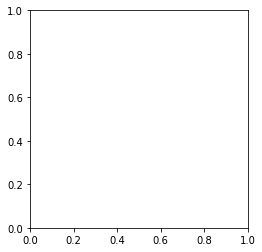

In [2]:
import tensorflow as tf
from tensorboard.plugins.hparams.api import KerasCallback
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plot
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import backend as K


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

if __name__ == '__main__':
    data = keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = data.load_data()
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    test_images = test_images.reshape(10000, 28, 28, 1)
    train_images = train_images.reshape(60000, 28, 28, 1)
    # test_images = np.pad(test_images, ((0,0), (98, 98), (98, 98), (0,0)), mode='constant', constant_values = (0,0))
    # train_images = np.pad(train_images, ((0, 0), (98, 98), (98, 98), (0, 0)), mode='constant', constant_values=(0, 0))

    print(len(train_images))
    print(test_images.shape)
    # model = keras.models.load_model('Trail.h5')

    # lets do our architecture
    # sequential is we put our layers in sequence

    model = keras.Sequential()
    model.add(Conv2D(input_shape=(28, 28, 1), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2) , padding="same"))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2) , padding="same"))
    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2) , padding="same"))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2) , padding="same"))
    model.add(Flatten())
    model.add(Dense(units=4096, activation="relu"))
    model.add(Dense(units=4096, activation="relu"))
    model.add(Dense(units=10, activation="softmax"))
    model.summary()
    # adam and loss function here are standard we may look at these later and how do they work
    # accuracy this is what we want to measure how accurate is our network
    # compile to give the model some parameters

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    # checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True,
    #                              save_weights_only=False, mode='auto', period=1)
    # early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
    # hist = model.fit_generator(steps_per_epoch=100, generator=train_images, validation_data=test_images, validation_steps=10,
    #                            epochs=100, callbacks=[checkpoint, early])

    # this is used to train our network check what epochs is in the copybook

    model.fit(train_images.reshape(60000, 28, 28, 1), train_labels, epochs=10)

    # now its time to check how our network works so we will see the accuracy
    test_loss, test_acc = model.evaluate(test_images.reshape(10000, 28, 28, 1), test_labels)
    print("our accuracy is ", test_acc)



    prediction = model.predict(test_images)
    for i in range(5):
            plot.grid(False)
            plot.imshow(test_images[i], cmap=plot.cm.binary)
            plot.xlabel("Actual: " + class_names[test_labels[i]])
            plot.title("Prediction: " + class_names[np.argmax(prediction[i])])
            plot.show()
    model.save("vgg16_weights.h5")
    weights = model.get_weights()
    print(weights)

